In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("C:/Users/Mohammad Nahle/Downloads/Techlabs Data/AcceptedLoans.csv")

In [67]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [68]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [70]:
df.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [71]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [72]:
df.loan_status_bin

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status_bin, Length: 396030, dtype: int64

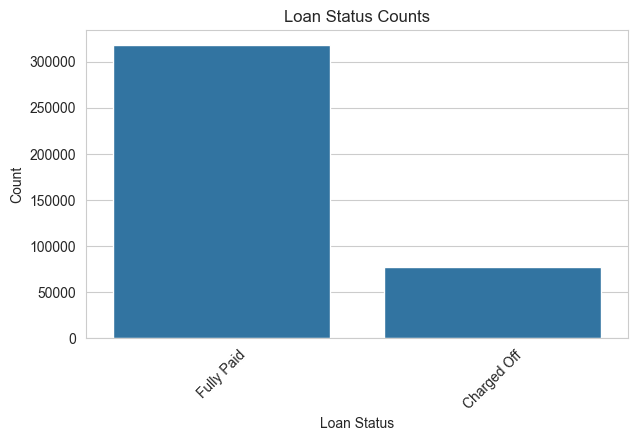

In [73]:
plt.figure(figsize=(7, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Optional: Rotate labels if they overlap
plt.show()

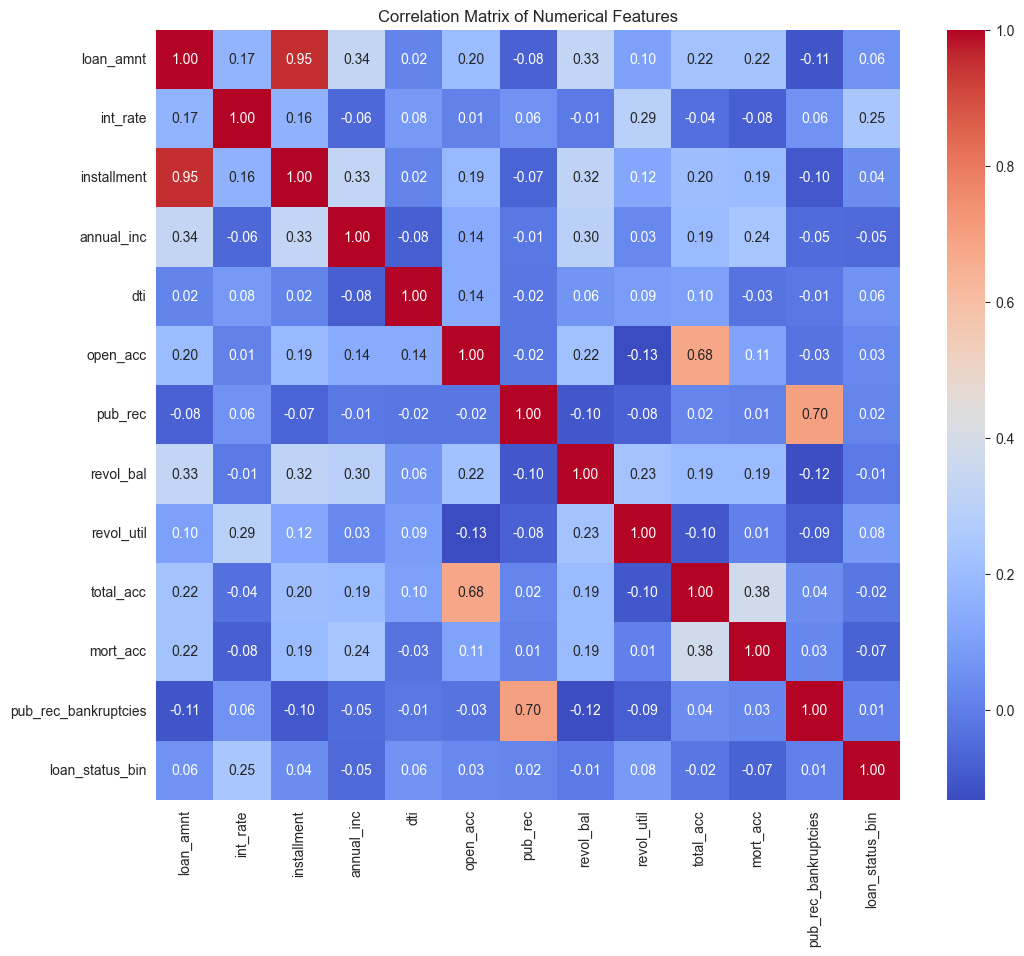

In [74]:

# Assume 'default_rate' is a column where 1 indicates default and 0 no default
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# We noticed almost perfect correlation between "loan_amnt" the "installment" feature (0.95)

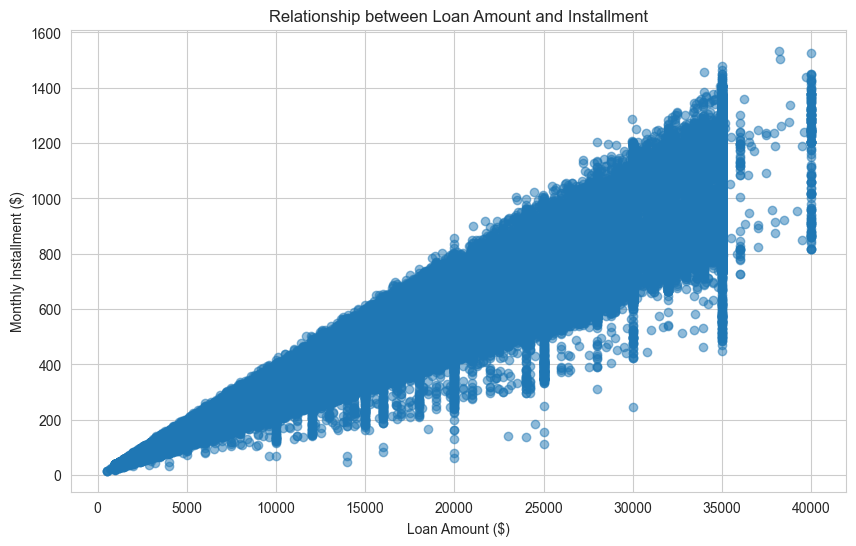

In [75]:
##################################### loan_amnt & installment ##########################################

#installment: The monthly payment owed by the borrower if the loan originates.
#loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

# The monthly installment is directly calculated from the loan amount using the interest rate and the term (length) of the loan. 
# Therefore, a higher loan amount will naturally lead to a higher installment, assuming the term and interest rate remain constant.

plt.figure(figsize=(10, 6))
plt.scatter(df['loan_amnt'], df['installment'], alpha=0.5)
plt.title('Relationship between Loan Amount and Installment')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Installment ($)')
plt.grid(True)
plt.show()



#clear linear pattern, this indicates a strong linear relationship, confirming the hypothesis about their correlation

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\195546442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='coolwarm')


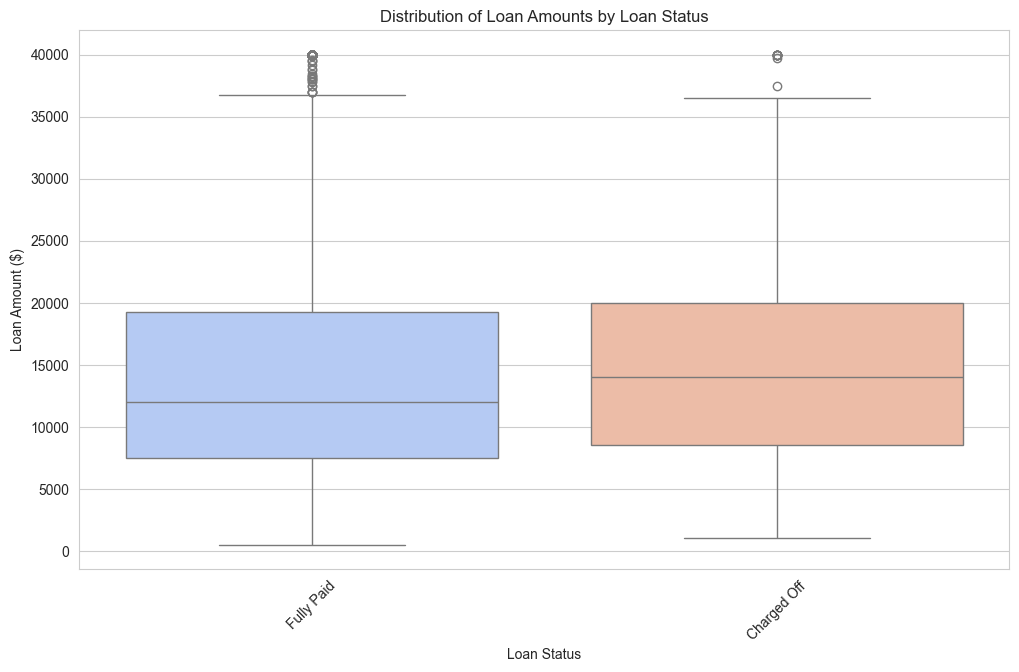

In [76]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='coolwarm')
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\1894200276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='installment', data=df, palette='coolwarm')


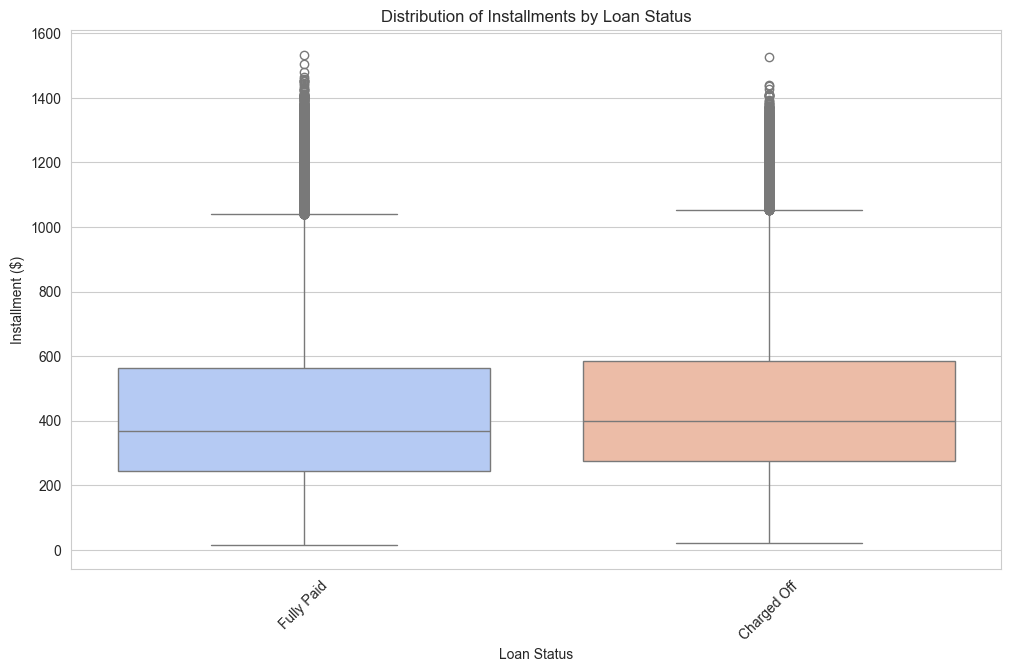

In [77]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='installment', data=df, palette='coolwarm')
plt.title('Distribution of Installments by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Installment ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [78]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1), y=df.groupby('sub_grade')['int_rate'].mean())

#Describing the linear connection between default rate and interest rate using linear regression


LinearRegression()

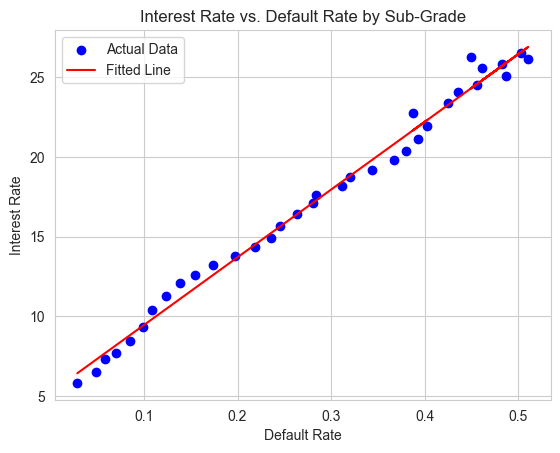

In [80]:
# Assuming 'df' is your DataFrame and it has been prepared with necessary preprocessing
# Creating the linear regression object
default_rate_means = df.groupby('sub_grade')['loan_status_bin'].mean()
interest_rate_means = df.groupby('sub_grade')['int_rate'].mean()

# Scatter plot
plt.scatter(default_rate_means, interest_rate_means, color='blue', label='Actual Data')

# Predicted values for the line plot using the linear regression model 'lr'
predicted_interest_rates = lr.predict(default_rate_means.values.reshape(-1, 1))

# Line plot
plt.plot(default_rate_means, predicted_interest_rates, color='red', label='Fitted Line')

# Adding labels and legend
plt.xlabel('Default Rate')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Default Rate by Sub-Grade')
plt.legend()  # This adds the legend to the plot

# Display the plot
plt.show()

In [81]:
print('interest rate = ', lr.intercept_, '+', lr.coef_[0], '* default rate')

interest rate =  5.216621308807113 + 42.43980704484836 * default rate


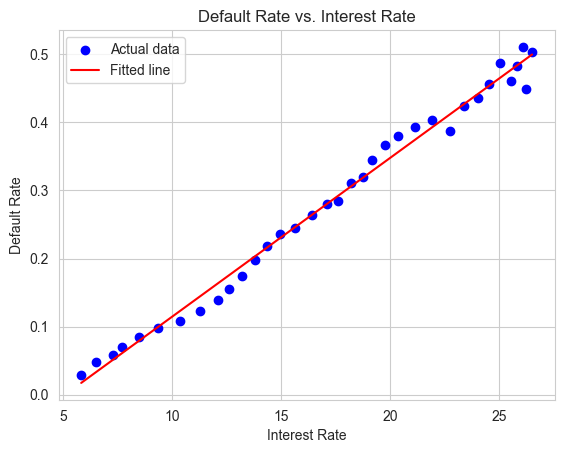

In [82]:
lr = LinearRegression()

# Fitting the model (switching x and y)
X = df.groupby('sub_grade')['int_rate'].mean().values.reshape(-1, 1)  # Interest rates as X
y = df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1, 1)  # Default rates as y

lr.fit(X, y)

# Making predictions
predicted_default_rates = lr.predict(X)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predicted_default_rates, color='red', label='Fitted line')

plt.title('Default Rate vs. Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
print(f'Default rate = {lr.intercept_[0]:.4f} + {lr.coef_[0][0]:.4f} * interest rate')


Default rate = -0.1186 + 0.0233 * interest rate


loan_status_bin          0          1
grade                                
A                 7.375193   7.656060
B                11.205611  11.344957
C                14.313326  14.335357
D                17.511978  17.416891
E                20.303191  20.249170
F                23.636009  23.788237
G                25.807075  26.010418


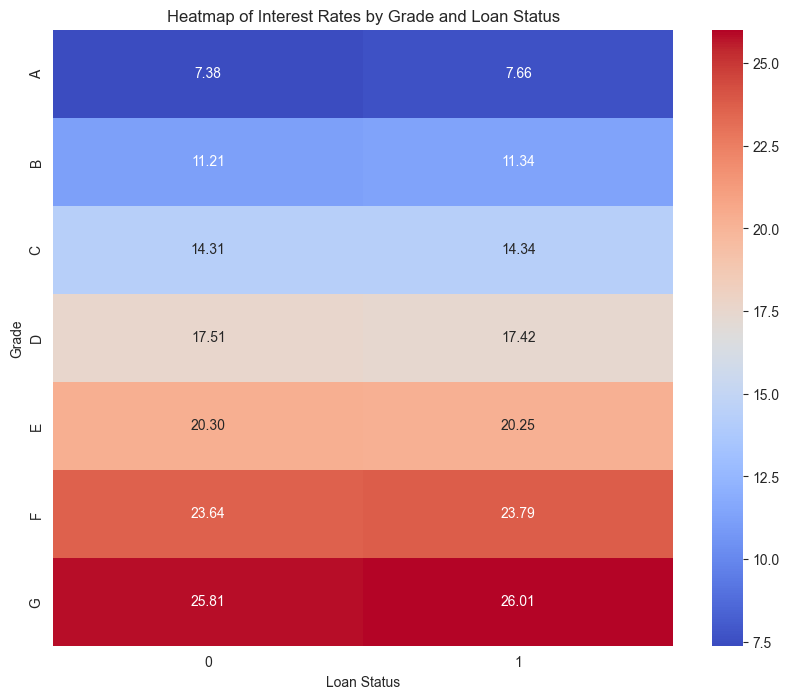

In [84]:

pivot_table = df.pivot_table(values='int_rate', index='grade', columns='loan_status_bin', aggfunc='mean')

# Display the pivot table
print(pivot_table)
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")  # 'fmt' is used to format the numerical values
plt.title('Heatmap of Interest Rates by Grade and Loan Status')
plt.ylabel('Grade')
plt.xlabel('Loan Status')
plt.show()

# 0 is fully paid, 1 is charged off

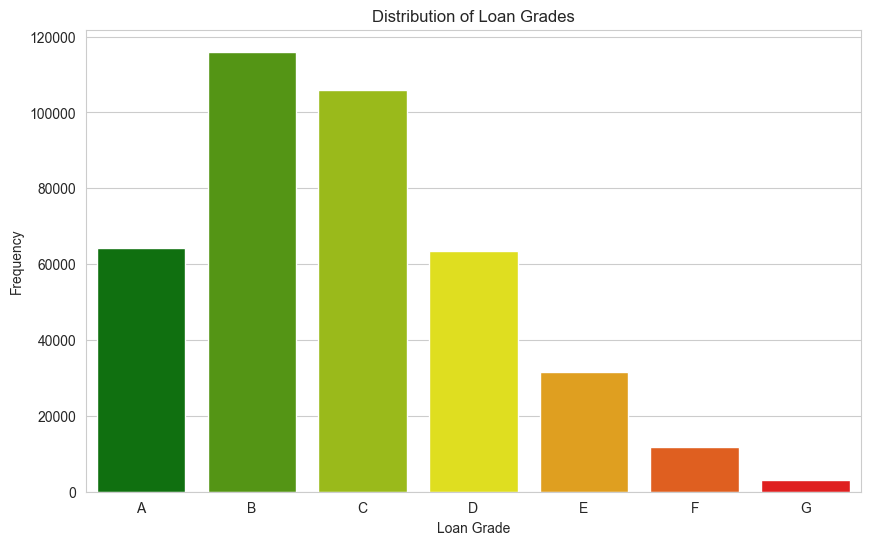

In [85]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("grade_cmap", ["green", "yellow", "red"])
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
colors = cmap(np.linspace(0, 1, len(grades)))
palette = dict(zip(grades, colors))
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='grade', data=df, palette=palette, order=sorted(df['grade'].unique()), hue='grade', legend=False)
plt.title('Distribution of Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\1919707860.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='grade', y='loan_status_bin', data=df, ci=None, palette=palette, order=order)
C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\1919707860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grade', y='loan_status_bin', data=df, ci=None, palette=palette, order=order)


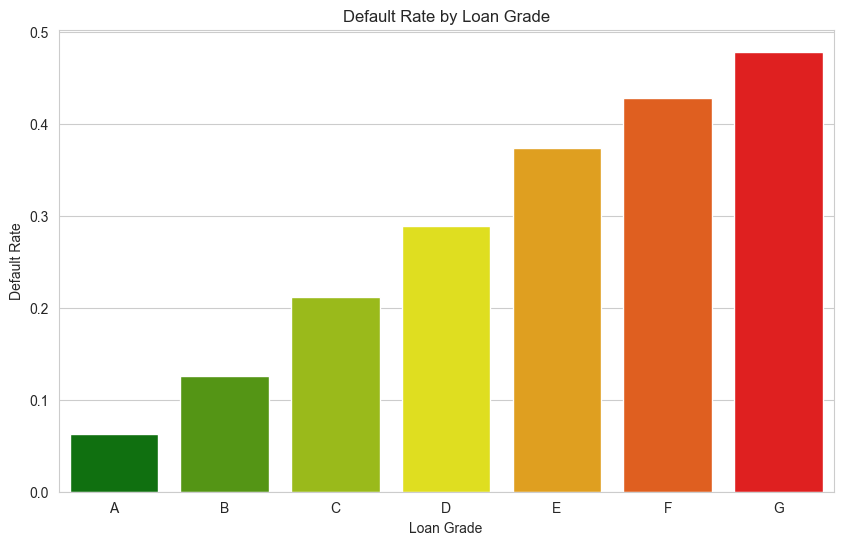

In [86]:
cmap = mcolors.LinearSegmentedColormap.from_list("grade_cmap", ["green", "yellow", "red"])
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
colors = cmap(np.linspace(0, 1, len(grades)))
palette = dict(zip(grades, colors))
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status_bin', data=df, ci=None, palette=palette, order=order)
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.show()

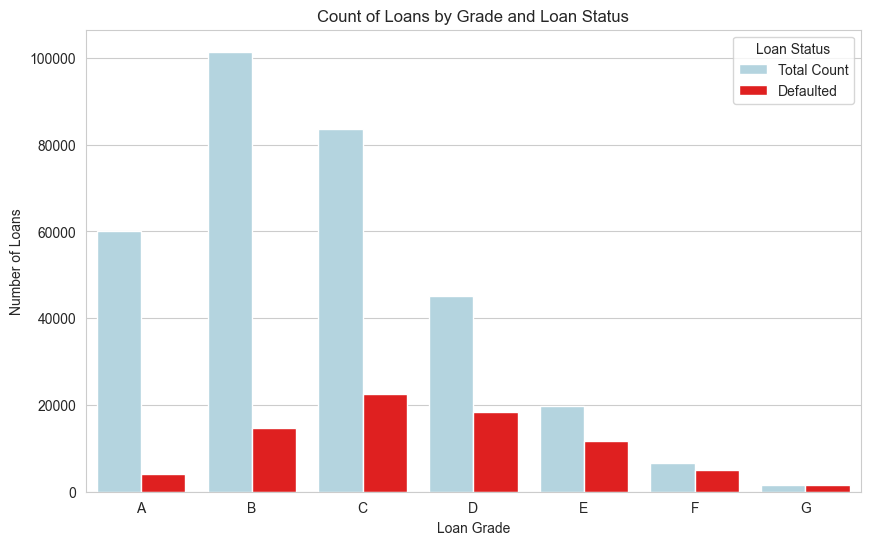

In [87]:
# Assuming df is your DataFrame and it contains columns 'grade' and 'loan_status_bin'
df['grade'] = pd.Categorical(df['grade'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)

# Define two colors for the loan status bins
loan_status_colors = {0: 'lightblue', 1: 'red'}  # Customize colors as needed

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status_bin', data=df, palette=loan_status_colors)
plt.title('Count of Loans by Grade and Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Total Count', 'Defaulted'])  # Adjust labels based on your definitions
plt.show()

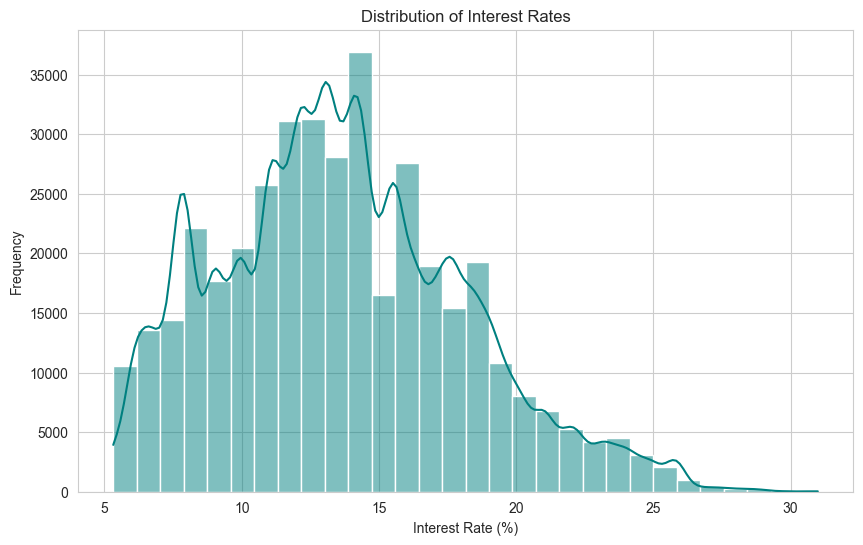

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], bins=30, kde=True, color='teal')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\2072453953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='emp_length', data=df, palette='coolwarm')


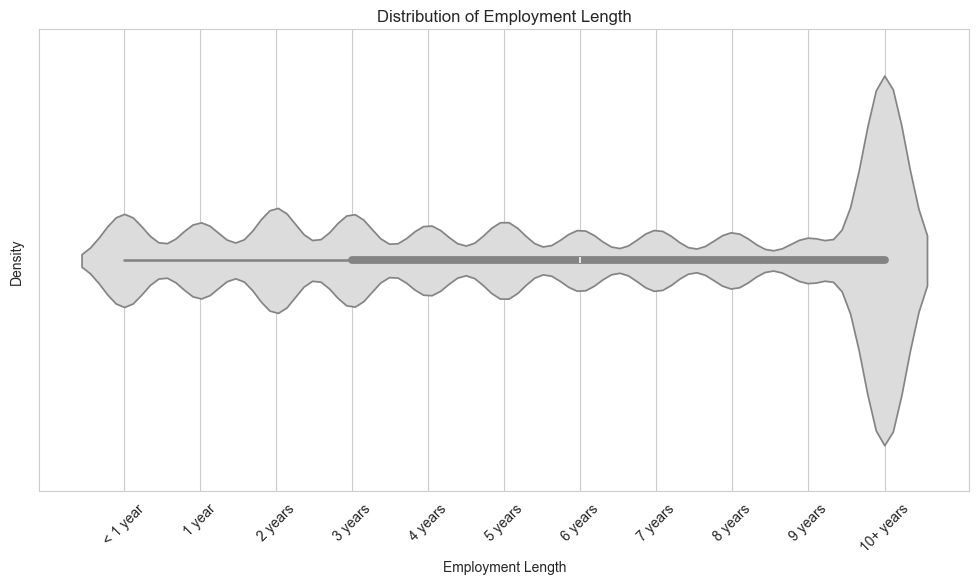

In [89]:
# Ensure that 'emp_length' is a categorical type for better ordering in the plot
df['emp_length'] = pd.Categorical(df['emp_length'], categories=[
    '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'], ordered=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='emp_length', data=df, palette='coolwarm')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Density')
plt.xticks(rotation=45)  # Rotating labels for better readability
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\2900808380.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='emp_length', y='loan_status_bin', data=df, join=False)


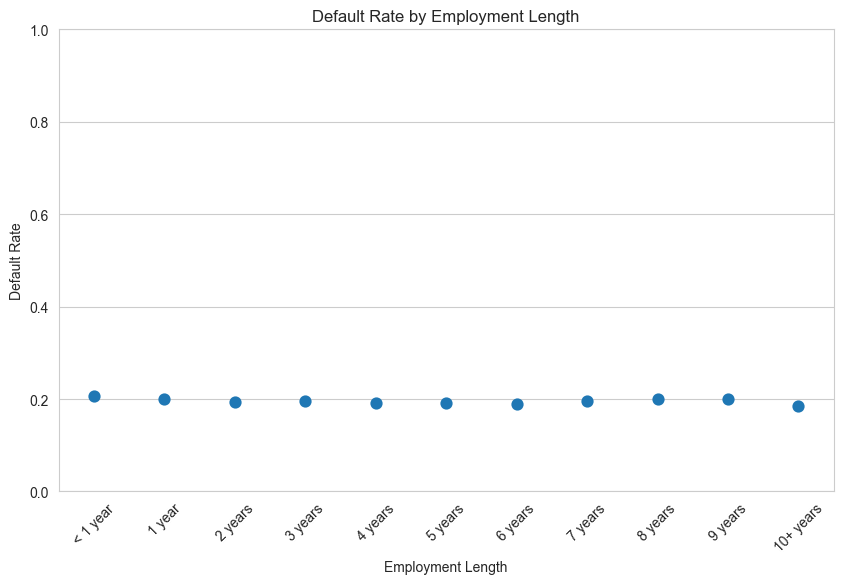

In [90]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='emp_length', y='loan_status_bin', data=df, join=False)
plt.ylim(0, 1)  # Assuming default_rate is a probability that ranges from 0 to 1
plt.title('Default Rate by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_16316\1405392583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='home_ownership', data=df, palette='coolwarm')


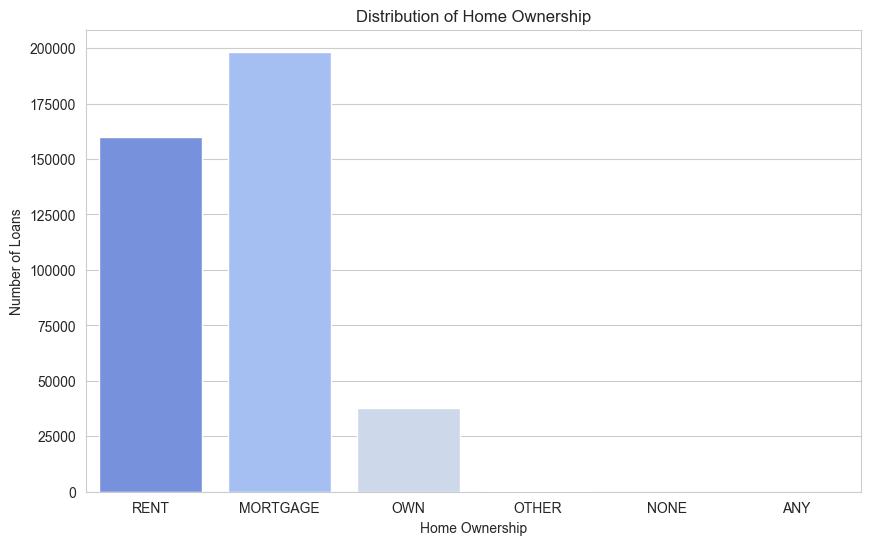

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=df, palette='coolwarm')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.show()

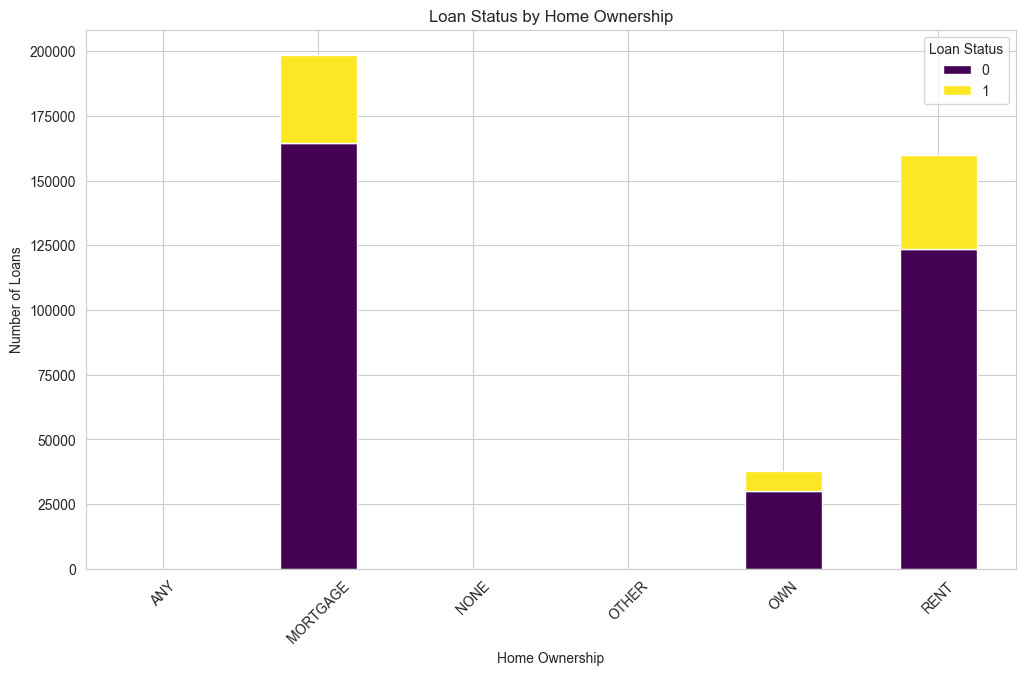

In [92]:
home_loan_status = df.groupby(['home_ownership', 'loan_status_bin']).size().unstack(fill_value=0)

# Plotting
home_loan_status.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

In [93]:
#Logistic regression is a statistical model used for binary classification tasks, which predicts the probability of the dependent variable being a success (usually coded as 1) based on one or more predictor variables.
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_status_bin'],
      dtype='object')

In [94]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_bin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",1


In [95]:
columns_with_na = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_na)

Columns with missing values: ['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

df.dropna(inplace=True)

In [97]:
df.shape

(335867, 28)

In [98]:
columns_to_drop = ['emp_title', 'issue_d', 'address', 'loan_status', "purpose", "title", "earliest_cr_line",'open_acc', 'pub_rec', 'revol_bal', "revol_util" ]

# Dropping the columns from the DataFrame
df = df.drop(columns=columns_to_drop, axis=1)

In [99]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'dti', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_status_bin'],
      dtype='object')

In [100]:
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [101]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status_bin
0,10000.0,36 months,11.44,329.48,2,B4,10+ years,RENT,117000.0,Not Verified,26.24,25.0,w,INDIVIDUAL,0.0,0.0,0
1,8000.0,36 months,11.99,265.68,2,B5,4 years,MORTGAGE,65000.0,Not Verified,22.05,27.0,f,INDIVIDUAL,3.0,0.0,0
2,15600.0,36 months,10.49,506.97,2,B3,< 1 year,RENT,43057.0,Source Verified,12.79,26.0,f,INDIVIDUAL,0.0,0.0,0
3,7200.0,36 months,6.49,220.65,1,A2,6 years,RENT,54000.0,Not Verified,2.60,13.0,f,INDIVIDUAL,0.0,0.0,0
4,24375.0,60 months,17.27,609.33,3,C5,9 years,MORTGAGE,55000.0,Verified,33.95,43.0,f,INDIVIDUAL,1.0,0.0,1


In [102]:
df_dummies = pd.get_dummies(df) #get dummy for categorical features

In [103]:
df_dummies

,loan_amnt,int_rate,installment,annual_inc,dti,total_acc,mort_acc,pub_rec_bankruptcies,loan_status_bin,term_ 36 months,...,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,329.48,117000.0,26.24,25.0,0.0,0.0,0,True,...,False,True,True,False,False,False,True,False,True,False
1,8000.0,11.99,265.68,65000.0,22.05,27.0,3.0,0.0,0,True,...,False,False,True,False,False,True,False,False,True,False
2,15600.0,10.49,506.97,43057.0,12.79,26.0,0.0,0.0,0,True,...,False,True,False,True,False,True,False,False,True,False
3,7200.0,6.49,220.65,54000.0,2.60,13.0,0.0,0.0,0,True,...,False,True,True,False,False,True,False,False,True,False
4,24375.0,17.27,609.33,55000.0,33.95,43.0,1.0,0.0,1,False,...,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,13.11,202.49,64000.0,10.81,9.0,0.0,0.0,0,True,...,False,True,True,False,False,False,True,False,True,False
396025,10000.0,10.99,217.38,40000.0,15.63,23.0,0.0,0.0,0,False,...,False,True,False,True,False,False,True,False,True,False
396026,21000.0,12.29,700.42,110000.0,21.45,8.0,1.0,0.0,0,True,...,False,False,False,True,False,True,False,False,True,False
396027,5000.0,9.99,161.32,56500.0,17.56,23.0,0.0,0.0,0,True,...,False,True,False,False,True,True,False,False,True,False


In [104]:
df_dummies.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_status_bin',
       'term_ 36 months', 'term_ 60 months', 'grade_1', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'sub_grade_A1',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'emp_length_< 1 year',
       'emp_length_1 year', 'emp_length_2 years', 'emp_length_3 years',
       'em

In [105]:
#Dropping these columns helps in reducing the dimensionality of the dataset. High-dimensional datasets can lead to overfitting in machine learning models
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)] #drop all dummy-variables which contain not at least 1% ones
df_dummies.drop(drop_columns, axis=1, inplace=True)

In [106]:
df_dummies

,loan_amnt,int_rate,installment,annual_inc,dti,total_acc,mort_acc,pub_rec_bankruptcies,loan_status_bin,term_ 36 months,...,emp_length_10+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
0,10000.0,11.44,329.48,117000.0,26.24,25.0,0.0,0.0,0,True,...,True,False,False,True,True,False,False,False,True,True
1,8000.0,11.99,265.68,65000.0,22.05,27.0,3.0,0.0,0,True,...,False,True,False,False,True,False,False,True,False,True
2,15600.0,10.49,506.97,43057.0,12.79,26.0,0.0,0.0,0,True,...,False,False,False,True,False,True,False,True,False,True
3,7200.0,6.49,220.65,54000.0,2.60,13.0,0.0,0.0,0,True,...,False,False,False,True,True,False,False,True,False,True
4,24375.0,17.27,609.33,55000.0,33.95,43.0,1.0,0.0,1,False,...,False,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,13.11,202.49,64000.0,10.81,9.0,0.0,0.0,0,True,...,False,False,False,True,True,False,False,False,True,True
396025,10000.0,10.99,217.38,40000.0,15.63,23.0,0.0,0.0,0,False,...,False,False,False,True,False,True,False,False,True,True
396026,21000.0,12.29,700.42,110000.0,21.45,8.0,1.0,0.0,0,True,...,False,True,False,False,False,True,False,True,False,True
396027,5000.0,9.99,161.32,56500.0,17.56,23.0,0.0,0.0,0,True,...,True,False,False,True,False,False,True,True,False,True


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [108]:
X = df_dummies.drop('loan_status_bin', axis=1)
y = df_dummies['loan_status_bin']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

sc = MinMaxScaler() #Scales each feature to a given range, typically between 0 and 1, helps in normalizing
clf = LogisticRegression(penalty='l1', C=0.01, solver='liblinear') #Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable L1 norm, liblinear optimization problems

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [111]:
pipe_lr.fit(X_train, y_train)
#This command effectively trains the model encapsulated within the pipeline on the provided training data.
#scaler (an instance of MinMaxScaler): This is responsible for scaling the feature data to a specified range, commonly 0 to 1.
#clf (an instance of LogisticRegression): This is the classification model that will make predictions based on the scaled features.

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [112]:
pipe_lr.score(X_train, y_train) #accuracy rate
# logistic regression model correctly predicts the outcome 80.33% of the time on the training dataset

0.803709065736733

ROC-AUC-score:  0.7105482965853723


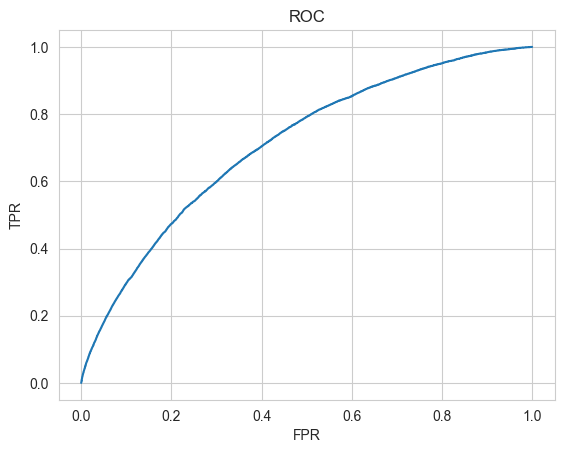

In [113]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, thresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

#these are commonly used metrics for assessing the effectiveness of a classification model,
#The AUC score ranges from 0.5 (no discrimination ability, equivalent to random guessing) to 1.0 (perfect discrimination). 
# A score of 0.7109 suggests that your model has a good, though not perfect, ability to distinguish between the classes.


#X-axis (False Positive Rate, FPR): This represents the proportion of negative instances that were incorrectly classified as positive. 
# It is calculated as the number of false positives divided by the total number of actual negatives.
#Y-axis (True Positive Rate, TPR or Sensitivity): This measures the proportion of actual positives that are correctly identified. 
# It is calculated as the number of true positives divided by the total number of actual positives.


#By examining the ROC curve and its AUC, you can assess not just the overall effectiveness of your model,
#  but also how well it manages the trade-off between catching as many positives as possible while minimizing false alarms.

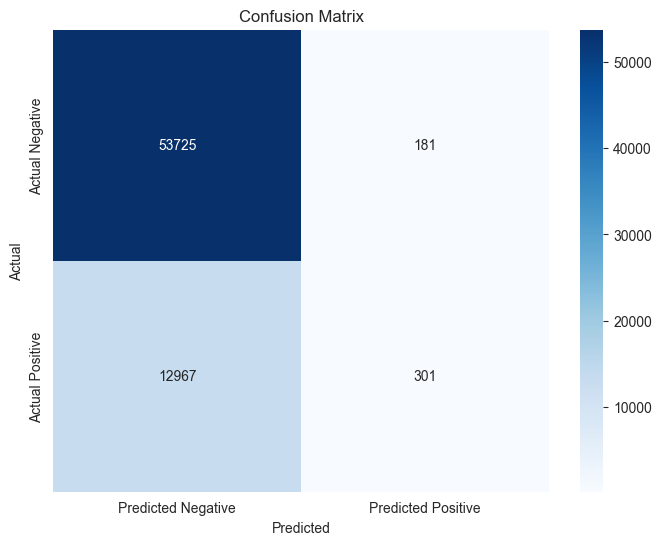

In [114]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming pipe_lr is your trained pipeline and X_test, y_test are your test datasets
y_pred = pipe_lr.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# True Negatives (Top Left - 53,322):
#This is the count of negative instances (e.g., non-default loans) that the model correctly predicted as negative. A high number here suggests good performance in identifying the negative class.
#False positives (Top Right - 584):

#This represents the number of negative instances that were incorrectly predicted as positive (e.g., predicting a loan would default when it does not). The relatively low number here indicates that the model is quite conservative with its positive class predictions, which is good for avoiding costly misclassifications in contexts like lending.
#False Negatives (Bottom Left - 12,588):

#These are positive instances (e.g., default loans) that the model incorrectly labeled as negative. This is quite high and could be a significant concern because it means the model is missing a lot of actual positive cases. In a financial context, these missed defaults could result in substantial financial losses.
#True Positives (Bottom Right - 680):

#These are the positive instances that were correctly predicted as positive. The low number here, relative to the false negatives, suggests that the model is not very effective at catching positive cases (defaults), which could be critical depending on the cost implications of such errors.#

In [115]:
##Testing with LR.score:

accuracy_score(y_test, pipe_lr.predict(X_test))
#This means that your logistic regression model correctly predicts the loan status (either default or non-default, depending on how loan_status_bin is defined) about 80.39% of the time on the unseen test data

0.8042695090362343

In [116]:
#which features are most important

for i in np.argsort(-np.abs(pipe_lr.named_steps['clf'].coef_[0])):
    print(X.columns[i], ': ', round(pipe_lr.named_steps['clf'].coef_[0,i], 2))
    

dti :  4.7
grade_1 :  -1.82
grade_2 :  -1.12
mort_acc :  -1.07
grade_3 :  -0.56
term_ 36 months :  -0.45
sub_grade_A1 :  -0.32
home_ownership_MORTGAGE :  -0.27
sub_grade_C1 :  -0.25
grade_4 :  -0.25
sub_grade_B1 :  -0.22
sub_grade_A5 :  0.17
verification_status_Not Verified :  -0.15
sub_grade_B2 :  -0.14
sub_grade_B5 :  0.13
sub_grade_D1 :  -0.11
home_ownership_OWN :  -0.11
grade_6 :  0.1
sub_grade_C2 :  -0.08
verification_status_Verified :  -0.07
emp_length_10+ years :  -0.06
sub_grade_C5 :  0.04
sub_grade_B3 :  -0.03
emp_length_< 1 year :  0.02
initial_list_status_w :  -0.02
installment :  0.01
sub_grade_E1 :  -0.01
sub_grade_D2 :  -0.0
sub_grade_B4 :  0.0
sub_grade_D4 :  0.0
emp_length_2 years :  0.0
emp_length_3 years :  0.0
emp_length_4 years :  0.0
emp_length_5 years :  0.0
emp_length_9 years :  0.0
emp_length_1 year :  0.0
emp_length_7 years :  0.0
emp_length_8 years :  0.0
verification_status_Source Verified :  0.0
home_ownership_RENT :  0.0
emp_length_6 years :  0.0
initial_li

In [117]:
#Positive coefficients imply a positive relationship with the target variable probability (e.g., the higher the feature value, the higher the likelihood of the target being 1).
#Negative coefficients imply an inverse relationship (e.g., the higher the feature value, the lower the likelihood of the target being 1).

#negative coefficients are good, they imply that the person is less risky. 

In [121]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [123]:
def clean_column_names(dataframe):
    # Replace or remove specific characters in column names
    dataframe.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in dataframe.columns]
    return dataframe

# Apply the function to your data
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

In [124]:
print(X_train.columns)  # Check the cleaned column names


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'term_ 36 months',
       'term_ 60 months', 'grade_1', 'grade_2', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'emp_length_ 1 year',
       'emp_length_1 year', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_10+ years', 'home_ownership_MORTGAGE', 'home_ownership_OW

In [126]:
param_grid = dict(
    n_estimators=stats.randint(10, 500),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1),
    tree_method=['hist'],  # Updated as per the new guidelines
    device=['cpu']  # Fallback to CPU
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=60, 
    scoring='roc_auc', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)

best_params = xgb_cv.best_params_
print(f"Best Parameters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Function to print scores
def print_score(y_true, y_pred, train=True):
    from sklearn.metrics import roc_auc_score, accuracy_score
    if train:
        print(f"Train Score: {roc_auc_score(y_true, y_pred)}")
    else:
        print(f"Test Score: {roc_auc_score(y_true, y_pred)}")

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\Users\Mohammad Nahle\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:58:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'device': 'cpu', 'learning_rate': 0.09231452106963656, 'max_depth': 4, 'n_estimators': 422, 'tree_method': 'hist'}
Train Score: 0.5373351847441107
Test Score: 0.5347656593030258


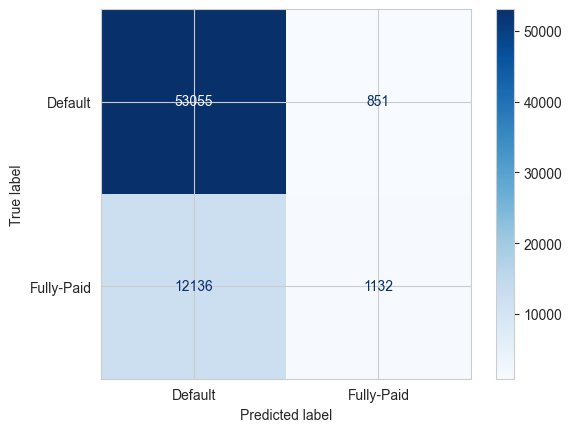

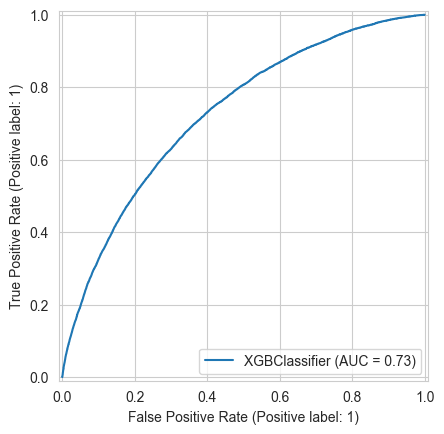

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

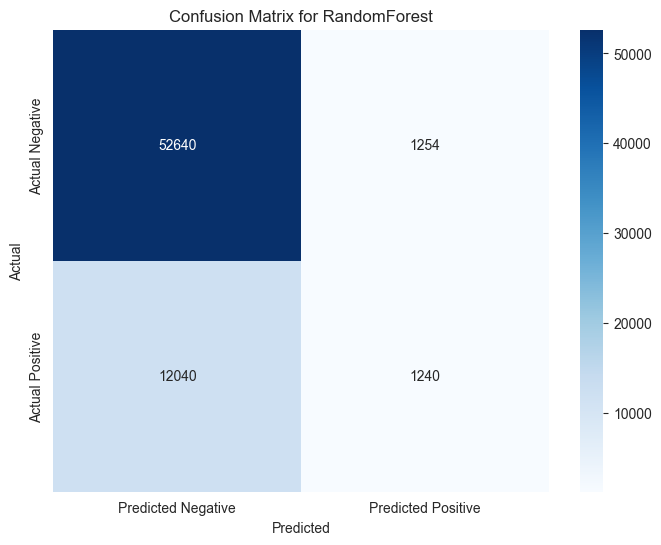

                 Feature  Importance
4                    dti    0.133938
3             annual_inc    0.117050
2            installment    0.113304
5              total_acc    0.107602
0              loan_amnt    0.097689
1               int_rate    0.095596
6               mort_acc    0.045963
7   pub_rec_bankruptcies    0.014602
51  emp_length_10+ years    0.014596
8        term_ 36 months    0.012930


In [135]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df_dummies' is your preprocessed DataFrame with dummy variables
X = df_dummies.drop('loan_status_bin', axis=1)
y = df_dummies['loan_status_bin']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for RandomForest')
plt.show()

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the features and their importances
print(features_df.head(10))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Mohammad Nahle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mohammad Nahle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mohammad Nahle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mohammad Nahle\AppData\Local\Programs\Python\Python312

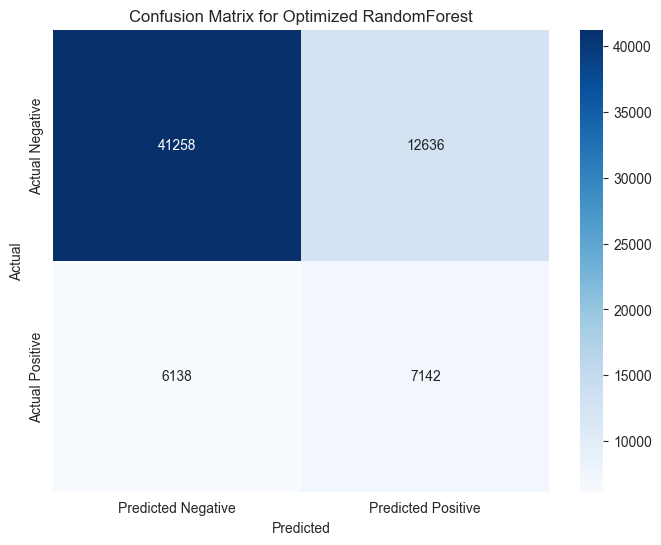

            Feature  Importance
1          int_rate    0.144928
4               dti    0.112751
3        annual_inc    0.088095
2       installment    0.080720
5         total_acc    0.068853
0         loan_amnt    0.067922
8   term_ 36 months    0.042782
10          grade_1    0.042455
6          mort_acc    0.039005
9   term_ 60 months    0.033824


In [136]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming 'df_dummies' is your preprocessed DataFrame with dummy variables
X = df_dummies.drop('loan_status_bin', axis=1)
y = df_dummies['loan_status_bin']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Create a RandomForest Classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight=class_weight_dict, max_depth=10)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Using the best estimator from the random search
rf_best = random_search.best_estimator_

# Fit the model on the training data using the best estimator
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Optimized RandomForest')
plt.show()

# Get feature importances from the best model
feature_importances = rf_best.feature_importances_

# Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(features_df.head(10))